# Classification Analysis of the Titanic Dataset (Midterm Project)
**Author:** Jarred Gastreich 
**Date:** November, 2, 2025 
**Objective:** This project tests multiple models that classify data for decision-making. The Titanic Dataset predicts survival on Titantic via multiple features.


## Import External Python Libraries

In [8]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier


from matplotlib.colors import ListedColormap
from pandas.plotting import scatter_matrix

# Section 1. Import and Inspect Data

### 1.1 Load the dataset and display the first 10 rows.

In [9]:
# Load dataset
titanic = sns.load_dataset('titanic')

# Display a few records to verify
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### 1.2 Check for missing values and display summary statistics

In [10]:
print("--- Missing Values Summary ---")
print(titanic.isnull().sum())

--- Missing Values Summary ---
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [11]:
print("\n--- Numerical Summary Statistics ---")
print(titanic.describe())

print("\n--- Categorical Summary Statistics ---")
print(titanic.describe(include='object'))


--- Numerical Summary Statistics ---
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

--- Categorical Summary Statistics ---
         sex embarked  who  embark_town alive
count    891      889  891          889   891
unique     2        3    3            3     2
top     male        S  man  Southampton    no
freq     577      644  537          

In [12]:
# Use .value_counts() on the 'pclass' column
pclass_counts = titanic['pclass'].value_counts()

# Display the results
print(pclass_counts)

pclass
3    491
1    216
2    184
Name: count, dtype: int64


## Reflection 1

#### What do you notice about the dataset? Are there any data issues?

**The first thing to be aware of with the missing values is that "age" and "deck" have significant missing values. We could use imputation techniques to estimate the missing values, or we may be deam the features necessary in the analysis.

There's also outlier issues regarding "fare". The mean fare is much higher than the median fare. This does not concern me too much due to the nature of the Titanic being which had low income and higher income passengers.

The other issue is that some features contain low-value information or they are in a format that is not usable for machine learning models. Name is a string. Sex (male/female) can be converted to numerical format. We will likely drop "ticket" because it has many unique value
**

# Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

Create histograms, boxplots, and count plots for categorical variables (as applicable).
Identify patterns, outliers, and anomalies in feature distributions.
Check for class imbalance in the target variable (as applicable).

...


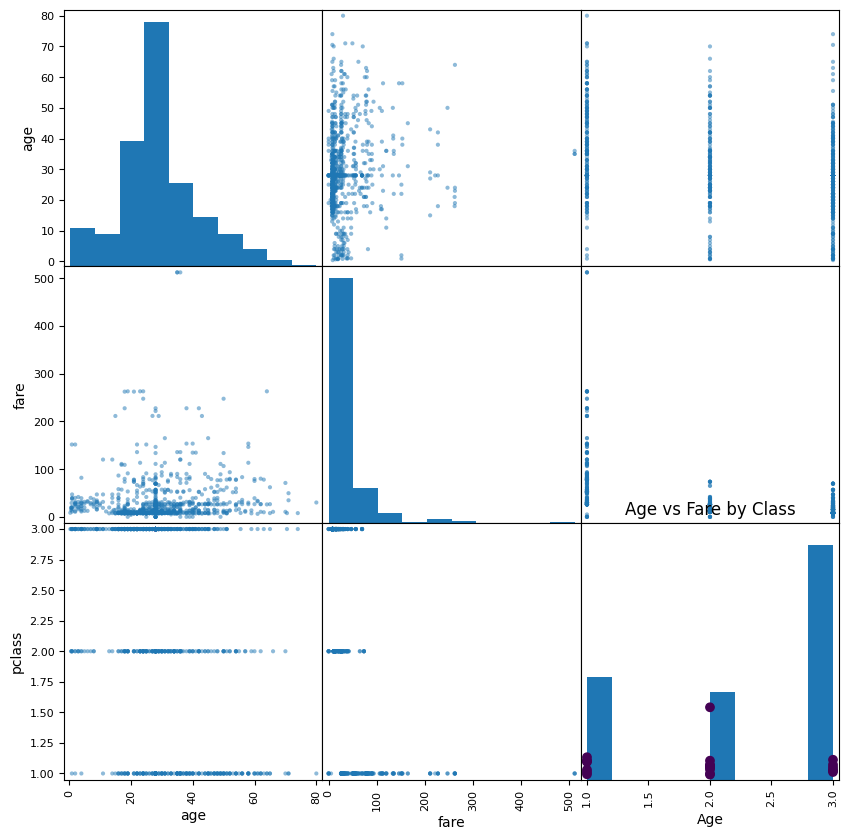

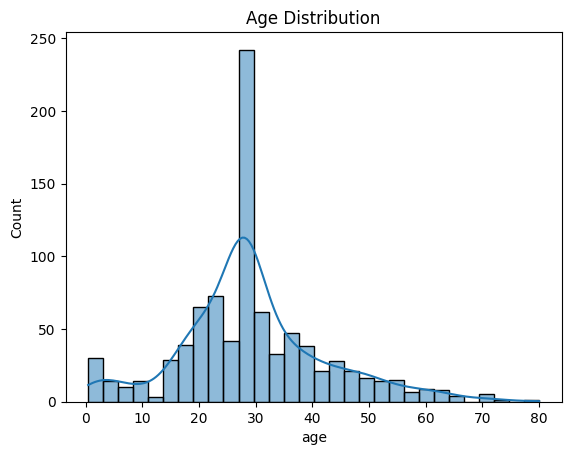

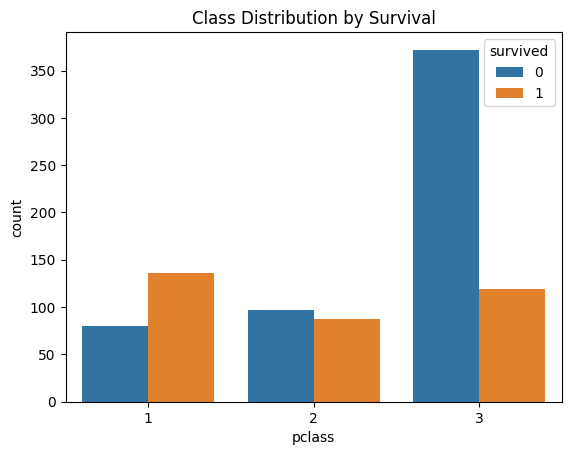

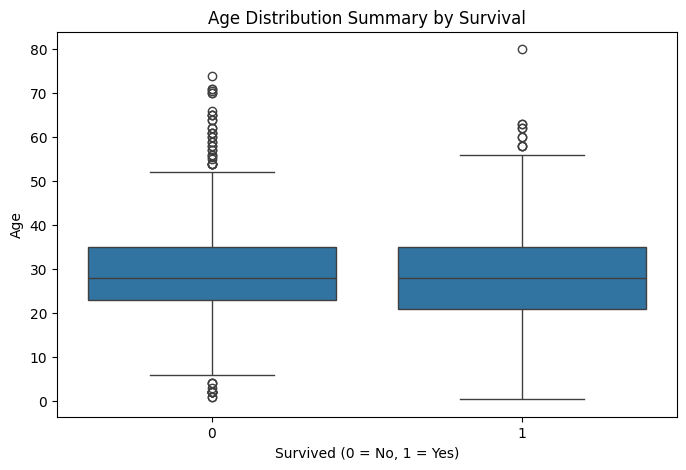

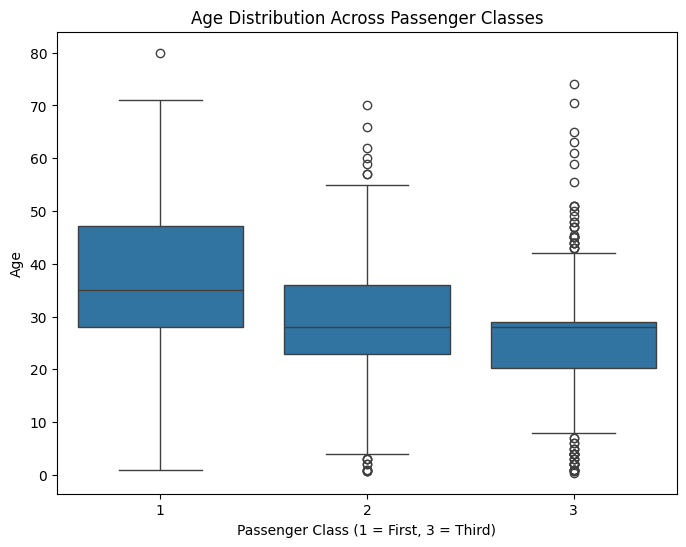

In [20]:
attributes = ['deck', 'age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))

print("...")

#Create a scatter plot of age vs fare by gender
plt.scatter(titanic['age'], titanic['fare'], c=titanic['pclass'].apply(lambda x: 0 if x == '3' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Class')
plt.show()

#Create a histogram of age:
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

#Create a count plot for class and survival
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

#Create a boxplot to show relationship between age and survival
plt.figure(figsize=(8, 5))
# 'x' is the binary survival column, and 'y' is the continuous age column
sns.boxplot(x='survived', y='age', data=titanic)
plt.title('Age Distribution Summary by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

#Create a boxplot to show relationship between age and passenger class
plt.figure(figsize=(8, 6))
# 'x' is the categorical variable (pclass), and 'y' is the continuous variable (age)
sns.boxplot(x='pclass', y='age', data=titanic)

plt.title('Age Distribution Across Passenger Classes')
plt.xlabel('Passenger Class (1 = First, 3 = Third)')
plt.ylabel('Age')
plt.show()

### 2.2 Handle missing values and clean data

Instead of finding averages to fill the missing age values, we can use signifiers to anticipate the ages based on other features.


Missing Age values after imputation:
0


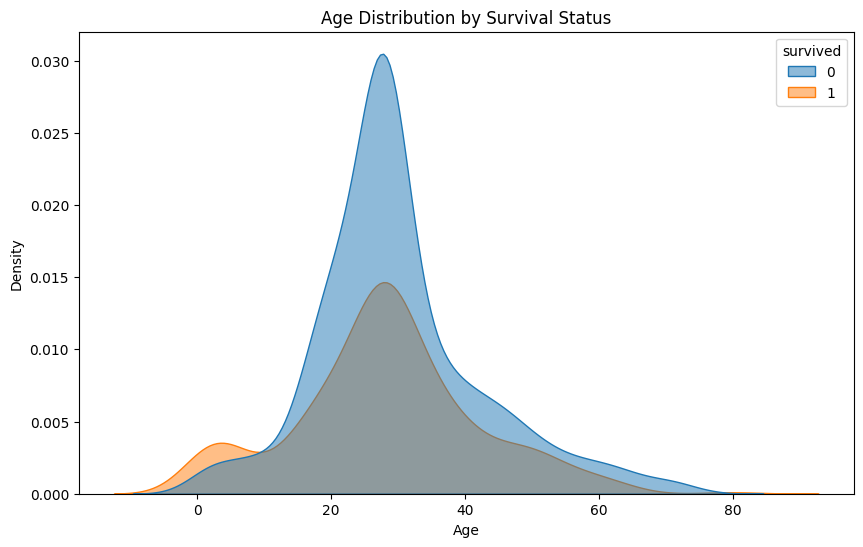

In [29]:
# Use pclass to impute missing age values.

# Calculate the mean age for each pclass and use it to fill NaN values
titanic['age'] = titanic['age'].fillna(
    titanic.groupby('pclass')['age'].transform('mean')
)

# Verify that there are now fewer missing Age values
print("Missing Age values after imputation:")
print(titanic['age'].isnull().sum())
mode_embark = titanic['embark_town'].mode()[0]
titanic['embark_town'] = titanic['embark_town'].fillna(mode_embark)

#Create a new plot to represent age and survival relation with all age values filled
plt.figure(figsize=(10, 6))
# This creates a smooth curve for the age distribution, separated by the 'survived' status
sns.kdeplot(
    data=titanic, 
    x='age', 
    hue='survived', 
    fill=True, 
    alpha=.5 
)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.show()


In [ ]:
#Clean embark town 
mode_embark = titanic['embark_town'].mode()[0]
titanic['embark_town'] = titanic['embark_town'].fillna(mode_embark)


# Map categories to numeric values
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

### 2.3 Feature selection and engineering

In [ ]:
# Create new feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Create the feature: 1 if FamilySize is 1 (alone), 0 otherwise
titanic['IsAlone'] = (titanic['FamilySize'] == 1).astype(int)

### Reflection 2
#### What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

I used the visuals to investigate the relationship between age and survival. The boxplot for the relationship between age and survival surprisingly was not very helpful. It shows that he median age is very slightly higher for those who did not survive. It's helpful to see the age dispersion visual to acknowledge that significantly more passengers were between 20 and 30 years old. Next, it was helpful to see if there was a relationship between age and pclass nad this is more significant because it showed that 1st class were quite a bit older on average -- older than 30 years old, on average. It's important to note that these visuals were run before the age feature has been transformed. 

To impute the missing age values, I noticed that the class of passengers had different median ages, so I used the median age of each class and filled in the missing age values based on that.

I noticed on the age/survial visual that there is a spike in infants and toddlers who survived which makes me assume that. This also leads to the creation of the new isalone feature because it's assumed that being alone decreases survival.